### Comparing Euphonic and Ab2tds

In [1]:
# Ignore errors resulting from matplotlib's fig.show(). This causes
# a warning when run from a notebook, but is still required if the
# scripts are run from the CL
import warnings
warnings.simplefilter("ignore", UserWarning)

### Structure Factor Comparison

Note that only the raw unbinned structure factors are used in the Ab2tds comparison, because it is not possible to get the Ab2tds S(Q,w) without a resolution function applied, and therefore a fair comparison isn't possible with the binned S(Q,w).

In addition, the Bragg peaks have been masked out in these comparisons as due to the 1/frequency factor these can be quite unstable and subject to floating point differences

#### Comparison Scripts

The `compare_sf` script can read structure factors from both Euphonic `StructureFactor` objects in a `.json` file, and Ab2tds structure factors written to a `alongthelineF.dat` file, and calculates the mean, min and max absolute/relative errors. It also applies a scaling factor, and sums the structure factors over degenerate modes. See the script for details on how it does this.

This scripts can be run for all the cuts for different materials to give an idea of how well they compare to experimental data.

#### Comparing with eigenvalues/vectors read from .phonon

Lets start with comparing the Ab2tds structure factors with Euphonic's structure factors that have been calculated with frequencies/eigenvectors read from a `.phonon` file:

In [2]:
from compare_sf import main as compare_sf_main
from compare_sqw import main as compare_sqw_main

quartz_cuts = ['2ph_m4_0_qe', '30L_qe_fine']
for cut in quartz_cuts:
    compare_sf_main(['--sf2', '../../quartz/' + cut + '/euphonic/sf_phonons_300K.json',
                     '--sf1', '../../quartz/' + cut + '/ab2tds/alongthelineF_300K.dat', '--mask-bragg', '-n' '2'])

lzo_cuts = ['kagome_qe', 'hh2_qe_fine']
for cut in lzo_cuts:
    compare_sf_main(['--sf2', '../../lzo/' + cut + '/euphonic/sf_phonons_300K.json',
                     '--sf1', '../../lzo/' + cut + '/ab2tds/alongthelineF_300K.dat', '--mask-bragg', '-n' '2'])

nb_cuts = ['110_qe', 'm110_qe']
for cut in nb_cuts:
    compare_sf_main(['--sf2', '../../nb/' + cut + '/euphonic/sf_phonons_300K.json',
                     '--sf1', '../../nb/' + cut + '/ab2tds/alongthelineF_300K.dat', '--mask-bragg', '-n' '2'])


Results for ../../quartz/2ph_m4_0_qe/ab2tds/alongthelineF_300K.dat ../../quartz/2ph_m4_0_qe/euphonic/sf_phonons_300K.json
Absolute Error - mean: 0.0008933332730945603 max: 0.27472482742462745 min: 3.9509908622590686e-10
Relative Error - mean: 0.003364152139790507 max: 0.058562528877154935 min: 8.177410056961313e-08
Points with largest mean relative error: (array([44, 50], dtype=int64), array([16, 11], dtype=int64))

Results for ../../quartz/30L_qe_fine/ab2tds/alongthelineF_300K.dat ../../quartz/30L_qe_fine/euphonic/sf_phonons_300K.json
Absolute Error - mean: 0.0001985648826042599 max: 0.14779271618073153 min: 1.9692201312654237e-10
Relative Error - mean: 0.0008320060010904542 max: 0.04394133420461468 min: 8.370246492626775e-08
Points with largest mean relative error: (array([24, 10], dtype=int64), array([6, 5], dtype=int64))

Results for ../../lzo/kagome_qe/ab2tds/alongthelineF_300K.dat ../../lzo/kagome_qe/euphonic/sf_phonons_300K.json
Absolute Error - mean: 8.695770112757871e-05 max:

The errors for all cuts are extremely small - the maximum error is just 0.33% for the Quartz 2ph_m4_0 cut. Let's look more closely at the q-points with the largest errors in the cuts just to make sure.

**LZO**


Results for ../../lzo/kagome_qe/euphonic/sf_phonons_300K.json ../../lzo/kagome_qe/ab2tds/alongthelineF_300K.dat
Absolute Error - mean: 8.811754177493357e-08 max: 0.00010897547374510985 min: 4.238039185618462e-18
Relative Error - mean: 0.0001850914351918144 max: 0.005427697526061048 min: 6.421761176113897e-08


<IPython.core.display.Javascript object>


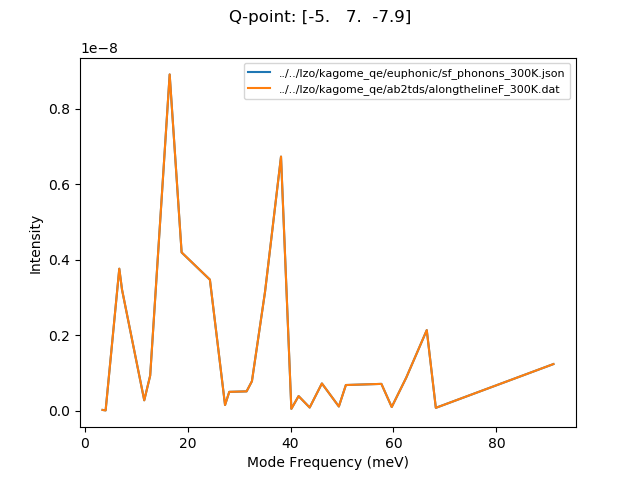

<IPython.core.display.Javascript object>


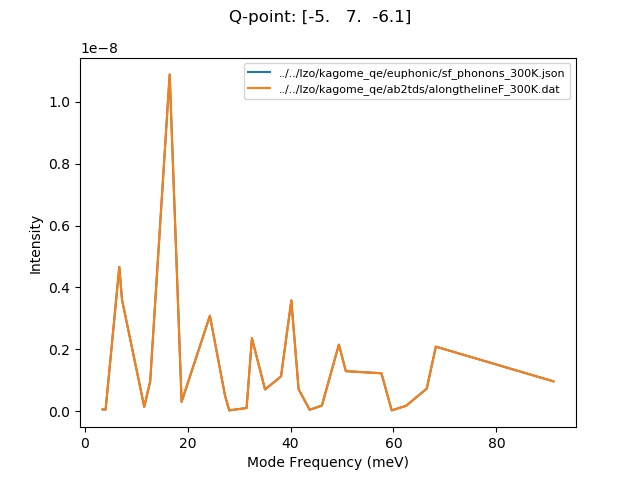

[]

In [3]:
%matplotlib notebook
compare_sf_main(['--sf1', '../../lzo/kagome_qe/euphonic/sf_phonons_300K.json',
                 '--sf2', '../../lzo/kagome_qe/ab2tds/alongthelineF_300K.dat', '--qpts', '79,61'])


Results for ../../lzo/hh2_qe_fine/euphonic/sf_phonons_300K.json ../../lzo/hh2_qe_fine/ab2tds/alongthelineF_300K.dat
Absolute Error - mean: 4.706396009775982e-08 max: 0.00023049598989643982 min: 5.955303983730473e-19
Relative Error - mean: 0.0002933393801349688 max: 0.010979522111478996 min: 1.6346401882446754e-07


<IPython.core.display.Javascript object>


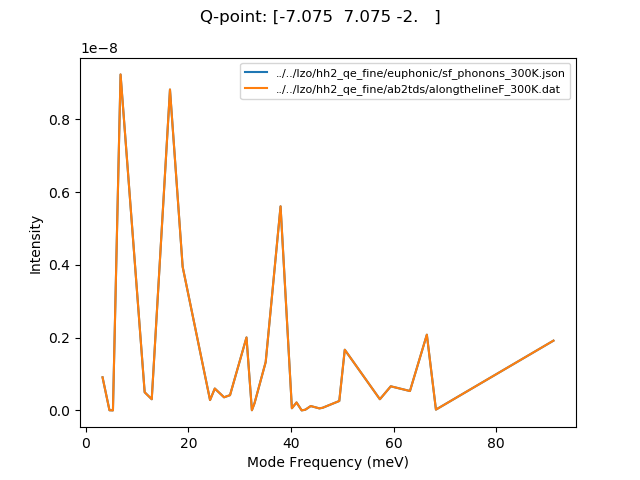

<IPython.core.display.Javascript object>


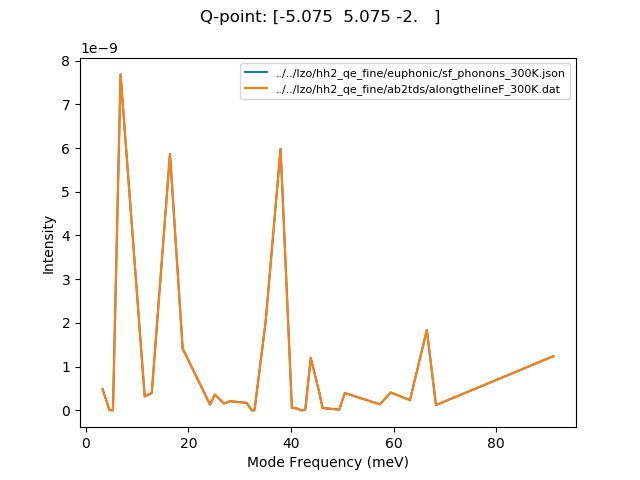

[]

In [4]:
%matplotlib notebook
compare_sf_main(['--sf1', '../../lzo/hh2_qe_fine/euphonic/sf_phonons_300K.json',
                 '--sf2', '../../lzo/hh2_qe_fine/ab2tds/alongthelineF_300K.dat', '--qpts', '37,117'])

**Quartz**


Results for ../../quartz/2ph_m4_0_qe/euphonic/sf_phonons_300K.json ../../quartz/2ph_m4_0_qe/ab2tds/alongthelineF_300K.dat
Absolute Error - mean: 9.694463173225859e-08 max: 0.0001366697505599812 min: 1.3309320803887848e-18
Relative Error - mean: 0.003356604227917296 max: 0.06217767542820554 min: 4.368417386875894e-07


<IPython.core.display.Javascript object>


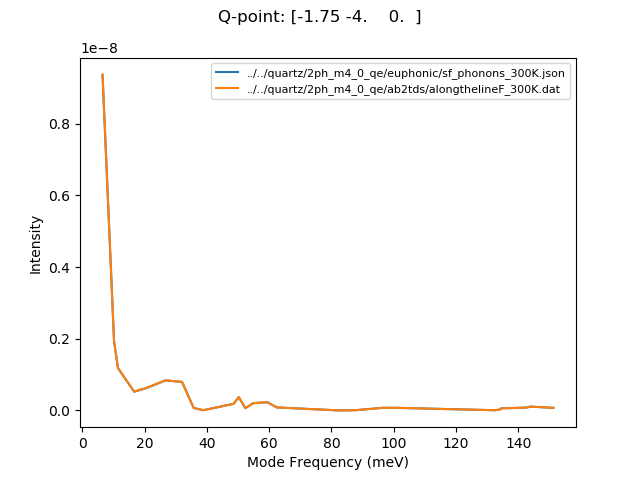

<IPython.core.display.Javascript object>


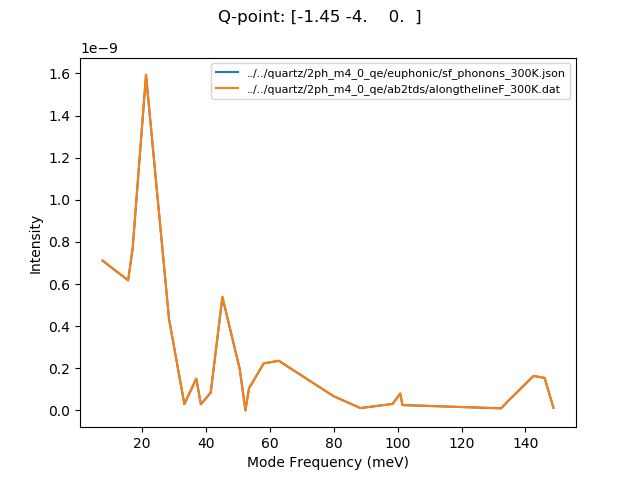

[]

In [5]:
%matplotlib notebook
compare_sf_main(['--sf1', '../../quartz/2ph_m4_0_qe/euphonic/sf_phonons_300K.json',
                 '--sf2', '../../quartz/2ph_m4_0_qe/ab2tds/alongthelineF_300K.dat', '--qpts', '44,50'])


Results for ../../quartz/30L_qe_fine/euphonic/sf_phonons_300K.json ../../quartz/30L_qe_fine/ab2tds/alongthelineF_300K.dat
Absolute Error - mean: 6.5290404717447285e-09 max: 1.65023772061533e-05 min: 6.163839215027572e-19
Relative Error - mean: 0.0008348550578020849 max: 0.04595582798349465 min: 6.296236678160232e-08


<IPython.core.display.Javascript object>


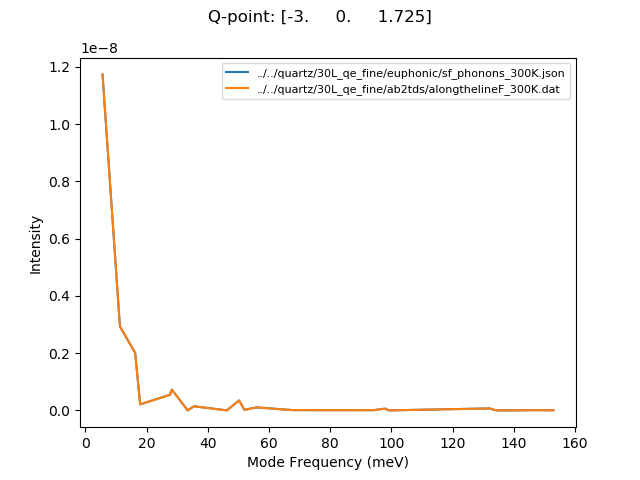

<IPython.core.display.Javascript object>


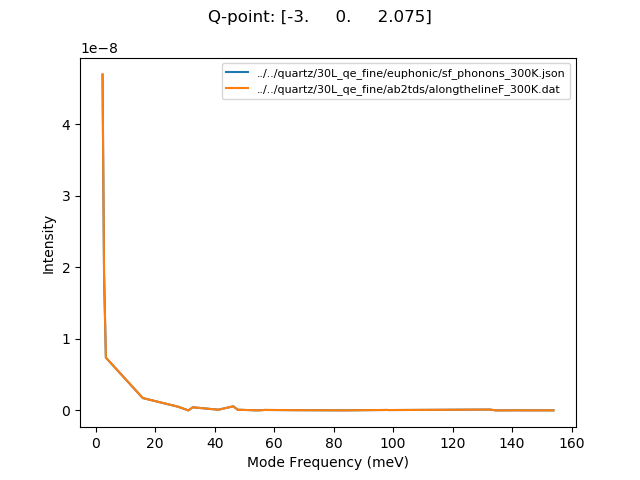

[]

In [12]:
%matplotlib notebook
compare_sf_main(['--sf1', '../../quartz/30L_qe_fine/euphonic/sf_phonons_300K.json',
                 '--sf2', '../../quartz/30L_qe_fine/ab2tds/alongthelineF_300K.dat', '--qpts', '24,10'])

**Nb**


Results for ../../nb/m110_qe/euphonic/sf_phonons_300K.json ../../nb/m110_qe/ab2tds/alongthelineF_300K.dat
Absolute Error - mean: 1.3624354215275683e-07 max: 1.5667996451723676e-05 min: 2.0154266915385205e-17
Relative Error - mean: 8.053379487985382e-06 max: 0.0004614167522478721 min: 8.262841545289916e-07


<IPython.core.display.Javascript object>


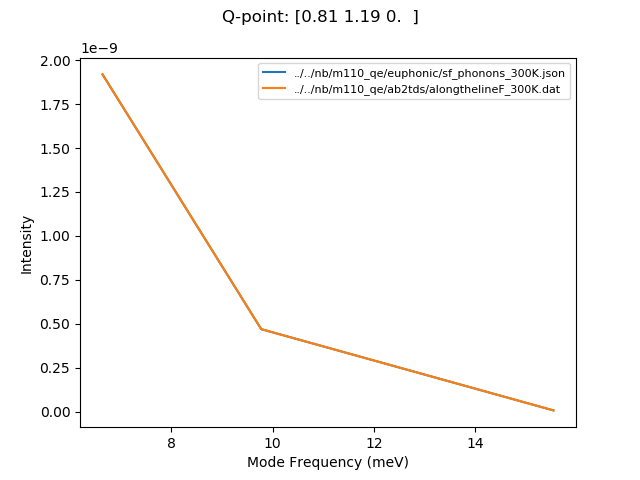

<IPython.core.display.Javascript object>


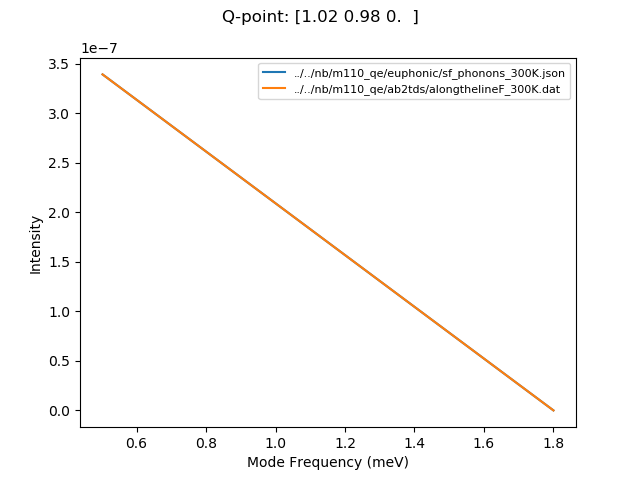

[]

In [10]:
%matplotlib notebook
compare_sf_main(['--sf1', '../../nb/m110_qe/euphonic/sf_phonons_300K.json',
                 '--sf2', '../../nb/m110_qe/ab2tds/alongthelineF_300K.dat', '--qpts', '39,18'])


Results for ../../nb/m110_qe/euphonic/sf_phonons_300K.json ../../nb/m110_qe/ab2tds/alongthelineF_300K.dat
Absolute Error - mean: 1.3624354215275683e-07 max: 1.5667996451723676e-05 min: 2.0154266915385205e-17
Relative Error - mean: 8.053379487985382e-06 max: 0.0004614167522478721 min: 8.262841545289916e-07


<IPython.core.display.Javascript object>


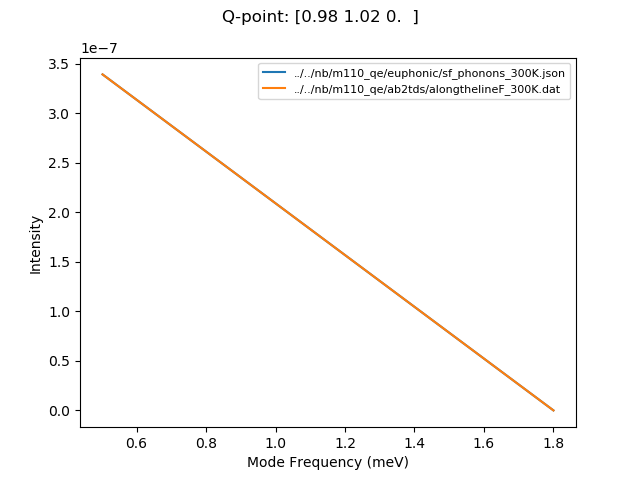

<IPython.core.display.Javascript object>


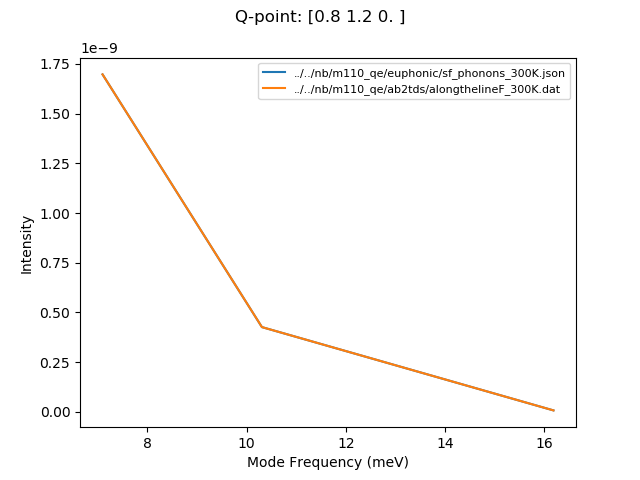

[]

In [11]:
%matplotlib notebook
compare_sf_main(['--sf1', '../../nb/m110_qe/euphonic/sf_phonons_300K.json',
                 '--sf2', '../../nb/m110_qe/ab2tds/alongthelineF_300K.dat', '--qpts', '22,40'])

#### Comparing with eigenvalues/vectors interpolated from .castep_bin

The `sf_phonons_100K.json` files contain Euphonic structure factors calculated with frequencies read from a `.phonon` file, but to test Euphonic's interpolation we'll now read from `sf_fc_100K.json` files which have been calculated with frequencies interpolated from a force constants matrix from a .castep_bin.

In [7]:
from compare_sf import main as compare_sf_main
from compare_sqw import main as compare_sqw_main

quartz_cuts = ['2ph_m4_0_qe', '30L_qe_fine']
for cut in quartz_cuts:
    compare_sf_main(['--sf1', '../../quartz/' + cut + '/euphonic/sf_fc_300K.json',
                     '--sf2', '../../quartz/' + cut + '/ab2tds/alongthelineF_300K.dat', '--mask-bragg'])

lzo_cuts = ['kagome_qe', 'hh2_qe_fine']
for cut in lzo_cuts:
    compare_sf_main(['--sf1', '../../lzo/' + cut + '/euphonic/sf_fc_300K.json',
                     '--sf2', '../../lzo/' + cut + '/ab2tds/alongthelineF_300K.dat', '--mask-bragg'])


nb_cuts = ['110_qe', 'm110_qe']
for cut in nb_cuts:
    compare_sf_main(['--sf2', '../../nb/' + cut + '/euphonic/sf_fc_300K.json',
                     '--sf1', '../../nb/' + cut + '/ab2tds/alongthelineF_300K.dat', '--mask-bragg'])


Results for ../../quartz/2ph_m4_0_qe/euphonic/sf_fc_300K.json ../../quartz/2ph_m4_0_qe/ab2tds/alongthelineF_300K.dat
Absolute Error - mean: 3.0270575140727393e-12 max: 9.878316722364797e-10 min: 1.86602784661901e-18
Relative Error - mean: 0.0033714021446403764 max: 0.06247320237369093 min: 4.5101656217305925e-07

Results for ../../quartz/30L_qe_fine/euphonic/sf_fc_300K.json ../../quartz/30L_qe_fine/ab2tds/alongthelineF_300K.dat
Absolute Error - mean: 8.662881535020032e-12 max: 3.784654001260695e-09 min: 3.2910585283213164e-18
Relative Error - mean: 0.003628385741791357 max: 0.7966464068881112 min: 4.0563323307696606e-07

Results for ../../lzo/kagome_qe/euphonic/sf_fc_300K.json ../../lzo/kagome_qe/ab2tds/alongthelineF_300K.dat
Absolute Error - mean: 2.888197937129644e-13 max: 2.5763751668595016e-11 min: 1.8663851028954162e-17
Relative Error - mean: 0.00021575985379673664 max: 0.0052863306891370605 min: 2.591695923267013e-07

Results for ../../lzo/hh2_qe_fine/euphonic/sf_fc_300K.json ..

These errors are slightly higher (as expected), but not by much and it demonstrates the correctness of Euphonic's calculated eigenvectors.